# 영업 성공 여부 분류 경진대회 개요
> 영업 과정에서 전환 가능성이 높은 고객에게 영업 자원을 집중하기 위해 고객의 전환 여부를 예측하기 위해 기계학습을 도입하고 있습니다.

MQL(NEW) - MQL managers(Assigned) - sales(Working) - (convert / not convert)

sales에게 다른 가이드를 주기 위함

- Lead: 자사 제품에 관심을 보이고 구매 가능성이 있는 잠재 고객
- MQL: lead고객 중 bant quatation에 대한 답변을 한 고객 (구매에 이르기까지 가능성이 높은 고객군)

| Column Name           | Description                                                                                   |
|-----------------------|-----------------------------------------------------------------------------------------------|
| bant_submit           | MQL 구성 요소 중 Budget(예산), Title(고객의 직책/직급), Needs(요구사항), Timeline(희망 납기일)에 대한 값의 비율 |
| customer_country      | 고객의 국적                                                                                    |
| business_unit         | MQL 요청 상품에 대응되는 사업부                                                               |
| com_reg_ver_win_rate  | Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산                           |
| customer_idx          | 고객의 회사명                                                                                 |
| customer_type         | 고객 유형                                                                                    |
| enterprise            | Global 기업인지, Small/Medium 규모의 기업인지                                                |
| historical_existing_cnt | 이전에 Converted(영업 전환) 되었던 횟수                                                    |
| id_strategic_ver      | 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여           |
| it_strategic_ver      | 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여           |
| idit_strategic_ver    | Id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현             |
| customer_job          | 고객의 직업군                                                                                 |
| lead_desc_length      | 고객이 작성한 Lead Descriptoin 텍스트 총 길이                                                |
| inquiry_type          | 고객의 문의 유형                                                                              |
| product_category      | 요청 제품 카테고리                                                                            |
| product_subcategory   | 요청 제품 하위 카테고리                                                                       |
| product_modelname     | 요청 제품 모델명                                                                              |
| customer_country.1    | 담당 자사 법인명 기반의 지역 정보(대륙)                                                      |
| customer_position      | 고객의 회사 직책                                                                             |
| response_corporate     | 담당 자사 법인명                                                                             |
| expected_timeline      | 고객의 요청한 처리 일정                                                                      |
| ver_cus               | 특정 Vertical Level 1(사업영역)이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치 |
| ver_pro               | 특정 Vertical Level 1(사업영역)이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치           |
| ver_win_rate_x        | 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값 |
| ver_win_ratio_per_bu  | 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산       |
| business_area         | 고객의 사업 영역                                                                              |
| business_subarea      | 고객의 세부 사업 영역                                                                         |
| lead_owner            | 영업 담당자 이름                                                                              |
| is_converted          | 영업 성공 여부. True일 시 성공.                                                               |


In [529]:
df_train['response_corporate'].isna().sum()

0

# import lib

In [ ]:
import pickle

with open(".pkl", "rb") as file:
    loaded_dict = pickle.load(file)

print("로드된 딕셔너리:", loaded_dict)

In [396]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [397]:
def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60

In [398]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [443]:
gy = ['bant_submit', 'customer_country', 'business_unit','customer_idx', 'customer_type']
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("submission.csv")
df_train = df_train[['bant_submit', 'customer_country', 'business_unit','customer_idx', 'customer_type','is_converted']]
df_test = df_test[gy]

# EDA

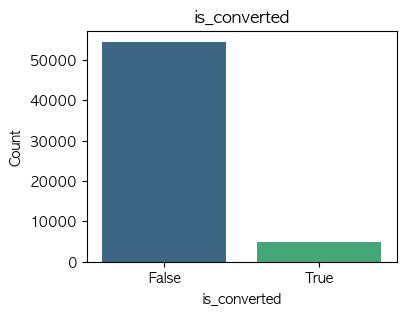

In [365]:
# y-label 분포
plt.figure(figsize=(4, 3))
sns.countplot(x=df_train['is_converted'], palette="viridis")

plt.title('is_converted')
plt.ylabel('Count')
plt.show()

## column 분석

### bant_submit 범주 설명
> MQL 구성 요소 중 Budget(예산), Title(고객의 직책/직급), Needs(요구사항), Timeline(희망 납기일)에 대한 값의 비율
> 
> Data-type: 범주형 | 결측치: 0개

#### 데이터 특성
- 범주형
- 데이터의 의미는 잘 모르겠음
- y 값과의 관계도 직접적으로는 없어 보임

#### 전처리 idea
- 그대로

In [446]:
col = 'bant_submit'
print(df_train[col].value_counts())
print(f"{col} 결측치: ",df_train[col].isna().sum())

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64
bant_submit 결측치:  0


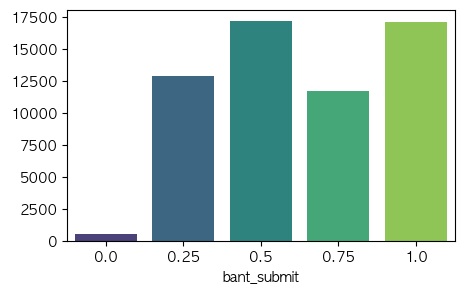

In [427]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df_train[col].value_counts().index, y=df_train[col].value_counts().values, palette='viridis')
plt.show()

In [466]:
# target과의 비율 비교
for val in [0.00,0.25,0.50,0.75,1.00]:
    dic = df_train[df_train[col] ==val]['is_converted'].value_counts().to_dict()
    num = sum(dic.values())
    print(f'[{val}] value')
    for i,j in dic.items():
        print(f'{i}: {j/num:.3f}')
    print()
# 비율 비교 결과 상관성이 없어보인다.

[0.0] value
False: 0.840
True: 0.160

[0.25] value
False: 0.901
True: 0.099

[0.5] value
False: 0.945
True: 0.055

[0.75] value
False: 0.904
True: 0.096

[1.0] value
False: 0.915
True: 0.085



In [467]:
df_train

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
59294    1.00
59295    0.75
59296    0.75
59297    1.00
59298    0.75
Name: bant_submit, Length: 58317, dtype: float64

---
### customer_country 범주 설명

> 고객의 국적
> 
> Data-type: 범주형 | `결측치: 982개`

#### 데이터 특성
1. 이메일 데이터가 있음 (@)
2. 큰 범주가 '//'로 묶여있다.
3. /U.A.E 도 있다
4. 대 소문자를 정하고 전처리 해야할 듯

#### 전처리 idea
1. 문자열 뒤에서 부터 / 시작 되기 전 까지를 끊으면 될 것 같다? (제일 큰 범주로 나눔)

   - '/Hydrated/India' -> 'India'
   - '//United Kingdom' -> 'United Kingdom'
3. 1의 방식으로 했더니 **기존 15399개 -> 308개**로 확 줄여짐

#### 결측치 idea
1. 982 개니까 label encoder를 돌릴 때 0으로 채워도 될 것 같다.
2. 아니면 제일 많은 india로 채우는 방법
3. 아님 잘 안떠오른다.

In [491]:
col = 'customer_country'
print(df_train[col].value_counts())
print(f"{col} 결측치: ",df_train[col].isna().sum())

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64
customer_country 결측치:  982


In [507]:
cond1 = df_train['customer_country'].str.contains('sp',na=False)
df_train[cond1]

bant_submit                                   customer_country  \
443           1.00                                            //spain   
444           1.00                                            //spain   
495           1.00                                            //spain   
496           1.00                                            //spain   
497           1.00                                            //spain   
498           0.75                                            //spain   
543           1.00                                            //spain   
544           1.00                                   /barcelona/spain   
545           1.00                                            //spain   
546           1.00                                            //spain   
547           0.75                                            //spain   
548           1.00                                            //spain   
557           1.00                      /santa catarina/gaspar/brazil   
568           1.00                                            //spain   
569           1.00                                            //spain   
570           1.00                                            //spain   
571           1.00                                            //spain   
719           1.00                                      /madrid/spain   
783           0.75                                            //spain   
784           1.00                                            //spain   
785           1.00                                            //spain   
786           1.00                                            //spain   
787           1.00                   c/gabriel lobo 27  /madrid/spain   
788           1.00                                            //spain   
1018          0.25                            sp  free domain//brazil   
1219          0.75                                            //spain   
1220          0.50                                            //spain   
1221          0.75                                            //spain   
1222          0.50                                      /madrid/spain   
1223          0.25                                            //spain   
1224          0.75                                            //spain   
1326          0.75                                       /gijón/spain   
1327          0.75                                       /gijón/spain   
1328          1.00                                            //spain   
1525          0.50                                            //spain   
1526          0.50                                            //spain   
1556          1.00                                            //spain   
1658          0.50                                            //spain   
2053          1.00                                      /madrid/spain   
2132          1.00                                            //spain   
2147          0.75                                            //spain   
2465          0.50                                   araras / sp / br   
2586          0.75                                     /split/croatia   
2686          0.75                                     /sevilla/spain   
2687          0.50                            /balearic islands/spain   
2688          0.75                                            //spain   
2746          0.75                     3301 highway 71  /spirit lake/   
2750          0.75                235 cornerstone blvd  /hot springs/   
2948          0.75       50675 yukon rd po box 537 /newberry springs/   
2949          0.75                        341 w 2nd s  /soda springs/   
2961          0.75              8641 colesville road  /silver spring/   
2995          0.75             one kobe way  /not hispanic or latino/   
3012          0.75                        341 w 2nd s  /soda springs/   
3027          0.75       1 galambos way  /sandy springs/united st

In [513]:
df_train['customer_country'].str.split('/').str[-2].str.strip().str.lower().value_counts()

customer_country
                                                                        15156
são paulo                                                                1707
mumbai                                                                    746
hyderabad                                                                 675
bangalore                                                                 658
lima                                                                      656
santiago                                                                  631
dubai                                                                     566
pune                                                                      559
delhi                                                                     488
chennai                                                                   399
bogotá                                                                    392
rio de janeiro                                 

In [511]:
cond = df_train['customer_country'].str.split('/').str[-2].str.strip().str.lower() == 'sp'#.str.contains("sp",na=False)
df_train[cond]#['customer_'.value_counts()

bant_submit                  customer_country business_unit  \
2465          0.50                  araras / sp / br            ID   
17273         0.50                        /sp/brazil            AS   
17336         0.50                        /sp/brazil            AS   
17453         0.25                        /sp/brazil            AS   
17466         0.25                        /sp/brazil            AS   
20142         0.75              /são paulo/sp/brazil            AS   
24664         0.50                        /sp/brazil            AS   
25344         1.00                        /sp/brazil            ID   
26646         0.75                        /sp/brazil            AS   
29286         1.00                   /tupã/sp/brazil            AS   
29298         1.00             /são paulo/ sp/brazil            AS   
29299         1.00             /são paulo/ sp/brazil            AS   
29320         1.00                        /sp/brazil            AS   
29375         1.00                        /sp/brazil            AS   
29444         1.00                        /sp/brazil            AS   
29447         1.00                        /sp/brazil            AS   
29540         1.00            /são paulo / sp/brazil            AS   
29630         0.50                        /sp/brazil            AS   
29678         0.50            /são paulo / sp/brazil            AS   
29684         0.50                        /sp/brazil            AS   
29692         0.50                        /sp/brazil            AS   
29717         0.50                        /sp/brazil            AS   
29859         1.00                        /sp/brazil            AS   
29860         1.00                        /sp/brazil            AS   
30302         1.00                 /amparo/sp/brazil            ID   
32566         1.00             /jaguariuna/sp/brazil            ID   
35783         0.75               /campinas/sp/brazil            AS   
35952         1.00                        /sp/brazil            AS   
35953         1.00                        /sp/brazil            AS   
35955         1.00                        /sp/brazil            AS   
36030         1.00                        /sp/brazil            AS   
36061         0.75                        /sp/brazil            AS   
36062         1.00             /são paulo/ sp/brazil            AS   
36374         1.00               /osasco / sp/brazil            AS   
36568         1.00                        /sp/brazil            AS   
36569         1.00                        /sp/brazil            AS   
36599         1.00                        /sp/brazil            AS   
36649         1.00                /atibaia/sp/brazil            AS   
36681         0.75                        /sp/brazil            AS   
36682         0.75                        /sp/brazil            AS   
36683         1.00            /são paulo / sp/brazil            AS   
37706         0.50                  /itu / sp/brazil            AS   
37708         0.50                  /itu / sp/brazil            AS   
37768         0.50                        /sp/brazil            AS   
37772         0.50                        /sp/brazil            AS   
37799         0.50                        /sp/brazil            AS   
37824         0.50                       /sp /brazil            AS   
37920         0.50                        /sp/brazil            AS   
37921         0.50                        /sp/brazil            AS   
37943         0.50                        /sp/brazil            AS   
37951         0.50                        /sp/brazil            AS   
38131         0.50                        /sp/brazil            AS   
38143         0.50                        /sp/brazil            AS   
38544         0.50                        /sp/brazil            AS   
38563         0.50                        /sp/brazil            AS   
38577         0.50                        /sp/brazil            AS   
38618         0.5

In [492]:
#기존
len(df_train[col].value_counts())

15399

In [493]:
# 소문자화
df_train[col] = df_train[col].str.lower()

In [494]:
#기존
len(df_train[col].value_counts())

13711

In [495]:
df = df_train[df_train[col].isna()==False]

In [496]:
# /시작되는 문자만 뽑기
# $는 마지막 문자
df.loc[:,col] = df[col].str.extract(r'/([^/]+)$')[0]

In [497]:
len(df[col].value_counts())

308

In [499]:
set_up()

In [500]:
df[col].value_counts()

customer_country
india                                                         16578
brazil                                                         8676
united states                                                  3740
philippines                                                    2538
mexico                                                         2296
colombia                                                       1961
u.a.e                                                          1617
saudi arabia                                                   1464
united kingdom                                                 1383
chile                                                          1221
italy                                                          1141
peru                                                           1135
germany                                                         894
poland                                                          822
vietnam                        

In [409]:
# 기존에 대입
new_idx = df[df['customer_country'].isna()==False].index
df_train.loc[new_idx,'customer_country'] = df[df['customer_country'].isna()==False]['customer_country']

In [410]:
idx = df[df['customer_country'].isna()==True].index

In [411]:
set_up()

In [412]:
# 나머지 처리가 안된 범주들
# 1. '//' 처리 -> 'None'으로 변경
# 2. '이메일' -> 'None' 으로 변경
# 3. 나머지 지역들은 아이디어가 필요함
df_train.loc[idx,'customer_country'].value_counts()#.str.contains("//")

customer_country
//                                                                                             669
mexico                                                                                         453
spain                                                                                          111
united kingdom                                                                                 104
egypt                                                                                           48
france                                                                                          32
united states                                                                                   27
700 patroon creek blvdalbanyny12206                                                             15
oman                                                                                            13
ecuador                                                                                     

##### 전처리

In [413]:
# '//' -> none으로 변경
cond2 = df_train['customer_country'].str.contains('^//$', regex=True,na=False)#["customer_country"]
df_train.loc[cond2,'customer_country'] = 'None'

In [414]:
# 이메일 -> none으로 변경
cond3 = df_train['customer_country'].str.contains('@', regex=True,na=False)
df_train.loc[cond3,'customer_country'] = 'None'

In [415]:
# 최종
df_train['customer_country'].value_counts()

customer_country
india                                                                                          16578
brazil                                                                                          8676
united states                                                                                   3767
mexico                                                                                          2749
philippines                                                                                     2538
colombia                                                                                        1963
u.a.e                                                                                           1617
united kingdom                                                                                  1487
saudi arabia                                                                                    1464
chile                                                                     

In [416]:
set_up(60)

In [417]:
df_train['customer_country'].fillna('None',axis = 0, inplace = True)

In [418]:
df_train['customer_country'].isna().sum()

0

---
### business_unit 범주 설명

> MQL 요청 상품에 대응되는 사업부
> 
> Data-type: 범주형 | 결측치: 0개

https://careers.lg.com/story/main/StoryDetail.rpi?requestStoryId=655

- It 사업부: 전자제품 개발
- AS 사업부: 장기간 as 제품을 공급받아 긍정적인 소비자 경험을 만들 수 있도록..
- ID 사업부: 디스플레이 솔루션을 통해 고객의 공간을 새롭게 만들어 가는 사업부 (tv, led, oled, ev 충전기)
- Solution 사업부: 고객과 함께 만들어 간다 -> 고객의 모든 니즈를 찾아 고객과 함께 맞춰 만들어 나간다. (버티컬 사업) (다양한 회사들과 사업관계 구축)



#### 데이터 특성
- 전형적인 범주화 특성을 지님
- 특이사항이 있다면 Solution과 Cm의 비율이 너무 적다.
- CM은 2개이므로 drop할까..? test데이터의 특성을 살펴봄

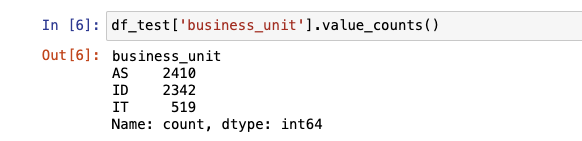

- 3개 범주밖에 없다
- 그 이후는 논의로 정하기로
- 이거 별로 전환율


나머지는 others

In [421]:
col = 'business_unit'
print(df_train[col].value_counts())
print(f"{col} 결측치: ",df_train[col].isna().sum())

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64
business_unit 결측치:  0


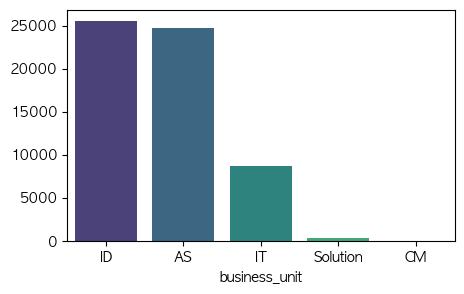

In [424]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df_train[col].value_counts().index, y=df_train[col].value_counts().values, palette='viridis')
plt.show()

---
### customer_idx 범주 설명

> 고객의 회사명
> 
> Data-type: 범주형 | 결측치: 0개

#### 데이터 특성
- 범주형 데이터이다
- 35112개의 회사가 있다. (value_counts)
- 번호의 의미가 무엇일까?
- test데이터엔 1 이라는 회사가 있고 train에는 1이라는 회사가 없다. 이럴 경우 어떻게 할 까?
  - 모델이 train할 때 모를 것 같은데?

#### 전처리 idea
- 35000개의 회사를 전부 라벨 인코더를 돌리기엔 무리가 있고, 의미도 없어보인다.
- train의 분포를 보니 어떻게 보면 data imbalance가 보인다. 특정 회사(47466)에 치우친 느낌
- 그럼 회사 빈도의 분포 비율을 가지고 범주화를 하는 건 어떨까?
  - 겹치는 회사가 있고 안겹치는 회사가 있으므로 빈도수로 범주화..?
 
단순한 생각인데 MQL에서 고객의 회사명이 많을 수록 convert 횟수가 많을 것 같은?
아님 그 historical_existing_cnt 이게 더 많을 것 같은 느낌?

groupby를

In [515]:
col = 'customer_idx'
print(df_train[col].value_counts())
print(f"{col} 결측치: ",df_train[col].isna().sum())

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
33350     135
43395      91
25309      90
33763      88
32240      84
37654      76
31864      71
37657      67
19804      65
29370      61
40344      59
21389      51
7195       50
37399      45
42067      43
14746      43
33776      33
742        30
6555       29
1747       28
46271      27
21883      26
37306      26
40491      26
4936       26
33773      25
9624       25
16590      23
33334      23
41291      22
7810       21
26780      21
20273      20
41505      20
8750       20
42108      19
44254      19
7740       19
31510      19
14804      18
15537      18
17224      18
37643      18
40542      17
20647      16
45319      16
47435      16
32806      16
39506      15
30184      15
310        15
32086      14
22865      14
30207      14
25354      14
9324       14
12753      14
37310      14
21239      14
12193      14
37607      14
28562      14
26337      14
13130      14
963        13
27735  

In [516]:
df_train[df_train[col] == 47466]

bant_submit                                   customer_country  \
50            0.75                                  /aurangabad/india   
151           1.00                                   /dddd/bangladesh   
509           1.00                                      /mumbai/india   
594           0.75                                   /ahmedabad/india   
951           0.50                                            //india   
1115          0.25                                   //united kingdom   
1371          1.00                                          //germany   
1797          0.75          125 lakeview dr, charleston, wv 25313/us/   
1798          0.75                  110 w 144th st  apt 5c /new york/   
2348          0.75                                     /kolkata/india   
2724          1.00                                      /jaipur/india   
2739          0.75                                          //germany   
2773          1.00  10,rue 2,lotissement abdelmoumen n 6 immeuble ...   
2774          1.00                                          //belgium   
2851          0.50                                            //india   
2917          1.00                                 /i̇stanbul/türkiye   
2922          1.00                                           //mexico   
3200          1.00                                           //france   
3202          1.00                                            //spain   
3203          1.00                                            //spain   
3257          1.00                                            //yemen   
3282          1.00                                            //egypt   
3283          1.00                                           //mexico   
3284          1.00                                      //switzerland   
3306          0.75            104 founders pointe s   /bloomingdale /   
3417          1.00                                            //spain   
3418          1.00                                            //spain   
3419          1.00                                            //spain   
3420          1.00                                            //spain   
3421          1.00                                            //spain   
3422          1.00                                            //spain   
3423          1.00                                            //spain   
3424          1.00                                            //spain   
3431          1.00                                           //sweden   
3432          1.00                                      /arzano/italy   
3435          0.75                                      /indore/india   
3436          0.75                                   /madhubani/india   
3470          1.00                                     /kolkata/india   
3471          1.00                                      /mumbai/india   
3472          1.00                                      /rajkot/india   
3477          0.75                                        /kola/india   
3489          1.00                                  /coimbatore/india   
3494          1.00                                      /mumbai/india   
3505          0.75                                     /ayodhya/india   
3526          1.00                                   /bhatapara/india   
3527          1.00                                       /surat/india   
3539          0.50                                    /bathinda/india   
3540          0.75                                     /neyveli/india   
3541          0.75                                      /mumbai/india   
3542          0.75                                    /guwahati/india   
3543          0.75                                    /warangal/india   
3544          0.75                                      /hardoi/india   
3545          0.75                                      /mumbai/india   
3552          0.75                                      /ranchi/i

In [439]:
df_train[col].reset_index(drop= True).sort_values(ascending=True)

2722         2
24371        3
34294        5
49534        7
51656        7
         ...  
16106    47466
16105    47466
16104    47466
16087    47466
16764    47466
Name: customer_idx, Length: 59299, dtype: int64

In [444]:
df_test[col].reset_index(drop= True).sort_values(ascending=True)

1575        1
682         4
2383        9
2887       22
461        30
        ...  
3120    47466
2087    47466
3108    47466
826     47466
0       47466
Name: customer_idx, Length: 5271, dtype: int64

In [442]:
df_train

bant_submit customer_country business_unit  customer_idx  \
0             1.00      philippines            AS         32160   
1             1.00      philippines            AS         23122   
2             1.00            india            AS          1755   
3             1.00            india            AS          4919   
4             1.00            india            AS         17126   
...            ...              ...           ...           ...   
59294         1.00           poland            AS         33747   
59295         0.75         colombia            AS         35420   
59296         0.75             peru            AS         19249   
59297         1.00             peru            AS         40327   
59298         0.75           france      Solution         30268   

               customer_type  is_converted  
0               End-Customer          True  
1               End-Customer          True  
2               End-Customer          True  
3               End-Customer          True  
4      Specifier/ Influencer          True  
...                      ...           ...  
59294           End Customer         False  
59295  Specifier/ Influencer         False  
59296  Specifier/ Influencer         False  
59297                    NaN         False  
59298                    NaN         False  

[59299 rows x 6 columns]

---
### customer_type 범주 설명

> 고객 유형
> 
> Data-type: 범주형 | `결측치: 43961개`

전체 b2b 사업군에서 어떤 역할을 하고 있는지
- 최종 사용자(end user, end-user)는 궁극적으로 제품을 사용하는 사용자가 되는 사람을 의미

#### 데이터 특성
- 결측치가 엄청 많다. 43000여개..
- 그냥 drop..?

#### 전처리 idea
-  End-Customer 과 End Customer를 같은 범주로 바꿔야한다.

#### 결측치 idea
- 이게 신청한 고객의 유형이라 남은 4만여개를 어떻게 채워야할지 잘 모르겠음
- 지극히 개인적인 유형이라 빈도수로 판단할 수 없고
- 지금 생각은 그냥 drop하는게 더 나은 판단일 수 있겠다..?

In [469]:
col = 'customer_type'
print(df_train[col].value_counts())
print(f"{col} 결측치: ",df_train[col].isna().sum())

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [485]:
cond3 = df_train[col].str.contains("End",na= False)

In [486]:
df_train[cond3]['is_converted'].value_counts()

is_converted
False    9183
True     1468
Name: count, dtype: int64